## Pipelines In SkLearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from brats.load_data import load_data
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
import pandas as pd 
from sklearn import svm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


In [3]:
from brats.load_data import load_data

# Import data
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 167
The number of columns: 725


In [4]:
# Remove missing data
remove_features = data.T[data.isna().sum(axis=0) < 130]
removed_features = remove_features.T
print(f'The number of samples: {len(removed_features)}')
print(f'The number of columns: {len(removed_features.columns)}')

# Impute nans
label = removed_features['label'].to_numpy() #extract labels
features = removed_features.drop('label', axis=1) #dropped laatste kolom (labels)
replace_div = features.replace(r'#DIV/0!', 'nan', regex=True) #DIV's worden vervangen door nan 
replace_inf = replace_div.replace(np.inf, np.nan, regex=True) #inf wordt vervangen door nan

feature_names = list(replace_inf.columns) #extract feature names
imputer = KNNImputer(n_neighbors=10) #definieert functie K-nearest neighbor imputer
clean_data = imputer.fit_transform(replace_inf) #alle nan's worden vervangen op basis van k-NN imputer

The number of samples: 167
The number of columns: 705


In [5]:
#convert labels to true and false
labels = label=='GBM'

In [6]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

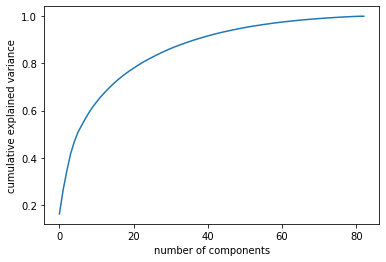

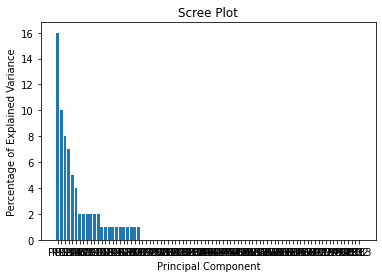

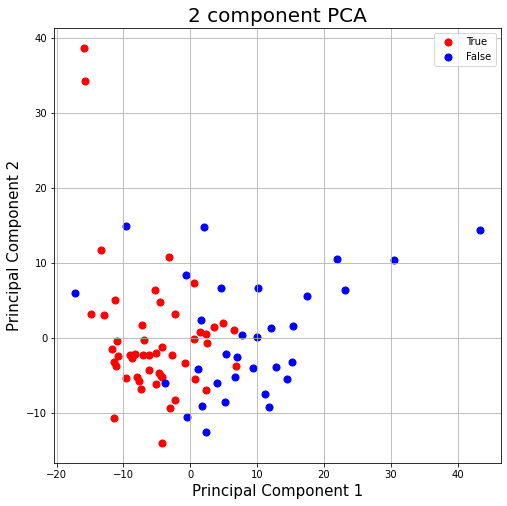

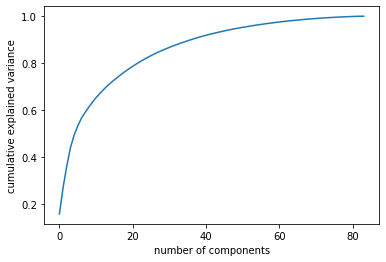

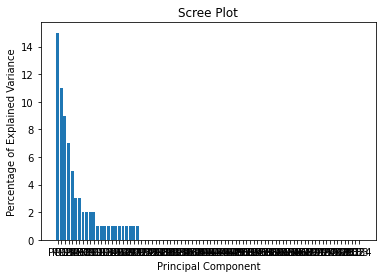

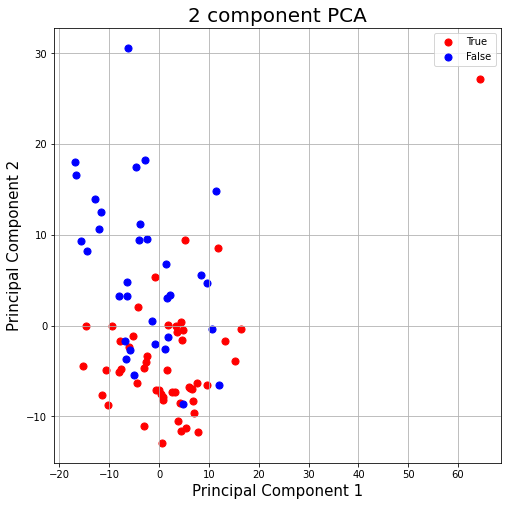

In [25]:
# check # components for PCA
rskf = StratifiedKFold(n_splits=2)
for train_index, test_index in rskf.split(features, label):
    data_train, data_test = clean_data[train_index], clean_data[test_index]
    label_train, label_test = labels[train_index], labels[test_index]
    #Standard Scaling
    scaler = StandardScaler().fit(data_train)
    data_train = scaler.transform(data_train)
    label_df = pd.DataFrame(data=label_train, columns=['target'])
    data_test = scaler.transform(data_test)
    #Train on trainingsdata and apply PCA
    # pca = PCA(n_components=j).fit(data_train)
    # train_array = pca.transform(data_train)
    # test_array = pca.transform(data_test)
    pca = PCA().fit(data_train)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    pca_data = pca.transform(data_train)

    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    per_var_array = per_var.squeeze().astype(np.int)
    pca_labels = ['PC' + str(x) for x in range(1, len(per_var_array)+1)]
    plt.figure()
    plt.bar(x=range(1,len(per_var_array)+1), height=per_var_array, tick_label=pca_labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title('Scree Plot')
    plt.show()

    pca_data = pd.DataFrame(data= pca_data, columns= pca_labels)
    finalDf = pd.concat([pca_data, label_df], axis= 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [True, False]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
                , finalDf.loc[indicesToKeep, 'PC2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

In [ ]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=40)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=20)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=20)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipeline_quadratic=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=20)),
                     ('qda_classifier',QuadraticDiscriminantAnalysis())])

In [ ]:
pipeline_gauss=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=20)),
                     ('qnb_classifier',GaussianNB())])

In [ ]:
pipeline_sgd=Pipeline([('scalar6',StandardScaler()),
                     ('pca6',PCA(n_components=20)),
                     ('sgd_classifier',SGDClassifier())])

In [ ]:
pipeline_knn=Pipeline([('scalar7',StandardScaler()),
                     ('pca7',PCA(n_components=20)),
                     ('knn_classifier',KNeighborsClassifier())])

In [ ]:
## LEts make the list of pipelines
pipelines = [pipeline_dt, pipeline_randomforest, pipeline_quadratic, pipeline_gauss, pipeline_sgd, pipeline_knn]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'Quadratic Discriminant Analysis', 3: 'Gaussian NB', 4: 'Stochastic Gradient Descent', 5: 'KNeighbors classifier'}


rskf = StratifiedKFold(n_splits=20) #ik heb random state verwijderd, daardoor worden steeds dezelfde r splits gemaakt

for train_index, test_index in rskf.split(features, label):
	data_train, data_test = clean_data[train_index], clean_data[test_index]
	label_train, label_test = labels[train_index], labels[test_index]
	for pipe in pipelines:
		pipe.fit(data_train, label_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(data_test,label_test)))

In [ ]:
for i,model in enumerate(pipelines):
    if model.score(data_test,label_test)>best_accuracy:
        best_accuracy=model.score(data_test,label_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

## Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", KNeighborsClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"classifier": [SVC()],
               "classifier__C": [0.1, 1, 10, 100, 1000],
               "classifier__gamma":[1, 0.1, 0.01, 0.001, 0.0001],
               "classifier__kernel": ['rbf']}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(data_train,label_train)

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", KNeighborsClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [5, 10, 20, 50],
                 "classifier__weights": ['uniform', 'distance']
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]
                 },
                 {"classifier": [SVC()],
                 "classifier__C": [0.1, 1, 10, 100, 1000],
                 "classifier__gamma":[1, 0.1, 0.01, 0.001, 0.0001],
                 "classifier__kernel": ['rbf', 'sigmoid', 'poly', 'linear']}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(data_train,label_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(data_test, label_test))

## MakePipelines In SKLearn

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(data_train,label_train)

In [ ]:
best_model.score(data_test,label_test)